## Network filtrations

Network filtrations are a powerful tool for analysing spatial networks at multiple resolutions. In a graph filtration, the network is systematically simplified or expanded by progressively adding or removing edges or nodes based on a chosen parameter, such as spatial distance or interaction strength. Properties of the network (i.e., centralities, structural measures) are then computed during this filtration process.

This multiscale approach reveals patterns and structures that might not be apparent in the network as a whole, allowing the study of how local interactions scale to global organisation. In spatial biology, graph filtrations are particularly useful for uncovering hierarchical and multiscale relationships, such as the spatial clustering of cells, gradients of molecular signals, or structural organisation in tissues.

**Note** The terms 'graph' and 'network' are interchangeable! A graph is just a network, and the term 'graph' is commonly used in more formal mathematical settings. When exploring the literature, try searching both graph filtrations and network filtrations. 

For some examples in biology, see: Lee et al. (2011) https://doi.org/10.1007/978-3-642-23629-7_37 or Ali et al.(2024).  https://doi.org/10.1101/2024.02.02.578605.

In this tutorial, we'll introduce how we might conduct simple distance-based filtration using our `networks` submodule in MuSpAn. We'll begin by revisiting how we might control edge distance in a network. Let's load in an example dataset.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Architecture
Number of objects: 5991
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(<Figure size 1500x1200 with 2 Axes>, <Axes: >)

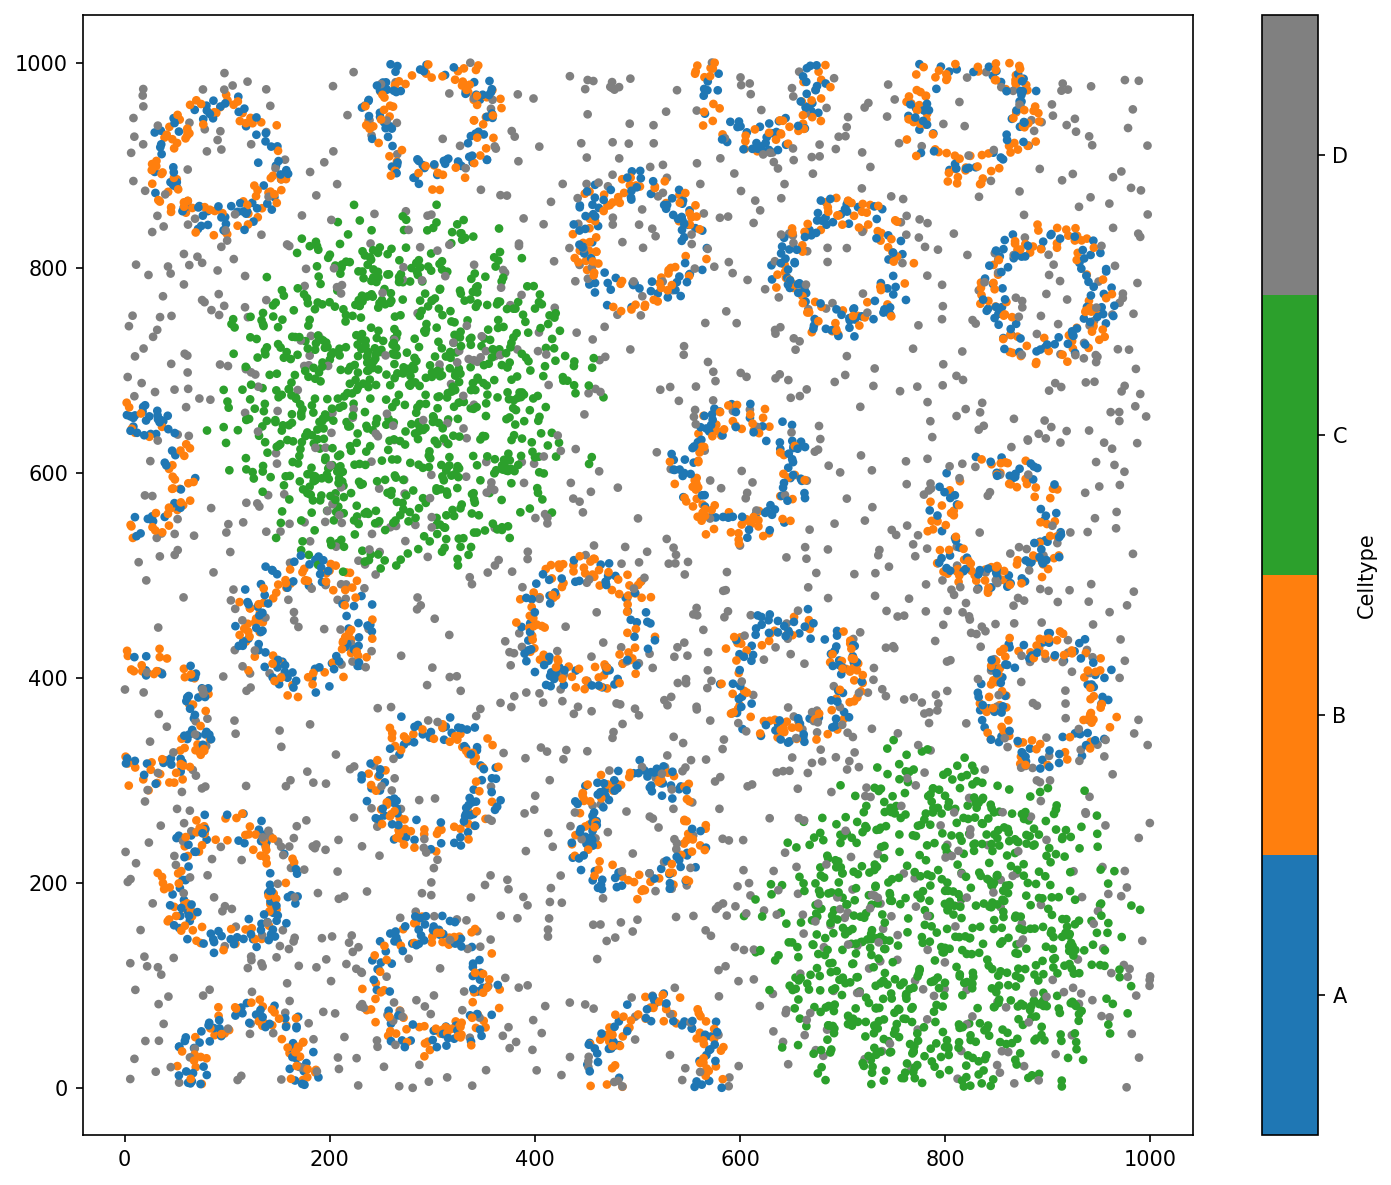

In [1]:
# Import necessary libraries
import muspan as ms
import matplotlib.pyplot as plt
import numpy as np

# Set the resolution of the plots
plt.rcParams['figure.dpi'] = 150

# Load the example domain 'Synthetic-Points-Architecture'
domain_arch = ms.datasets.load_example_domain('Synthetic-Points-Architecture')

# Visualise the domain with respect to 'Celltype'
ms.visualise.visualise(domain_arch, 'Celltype',marker_size=10)

As demonstrated in our 'creating networks' mini-series, we can control the maximum and minimum edge distance when construsting a spatial network using the `generate_network` function in the `networks` submodule. For example, let's make and visualise a Delaunay network with max edge distance at 10, 40 and 100 units only on the points with labels 'A' or 'B'.

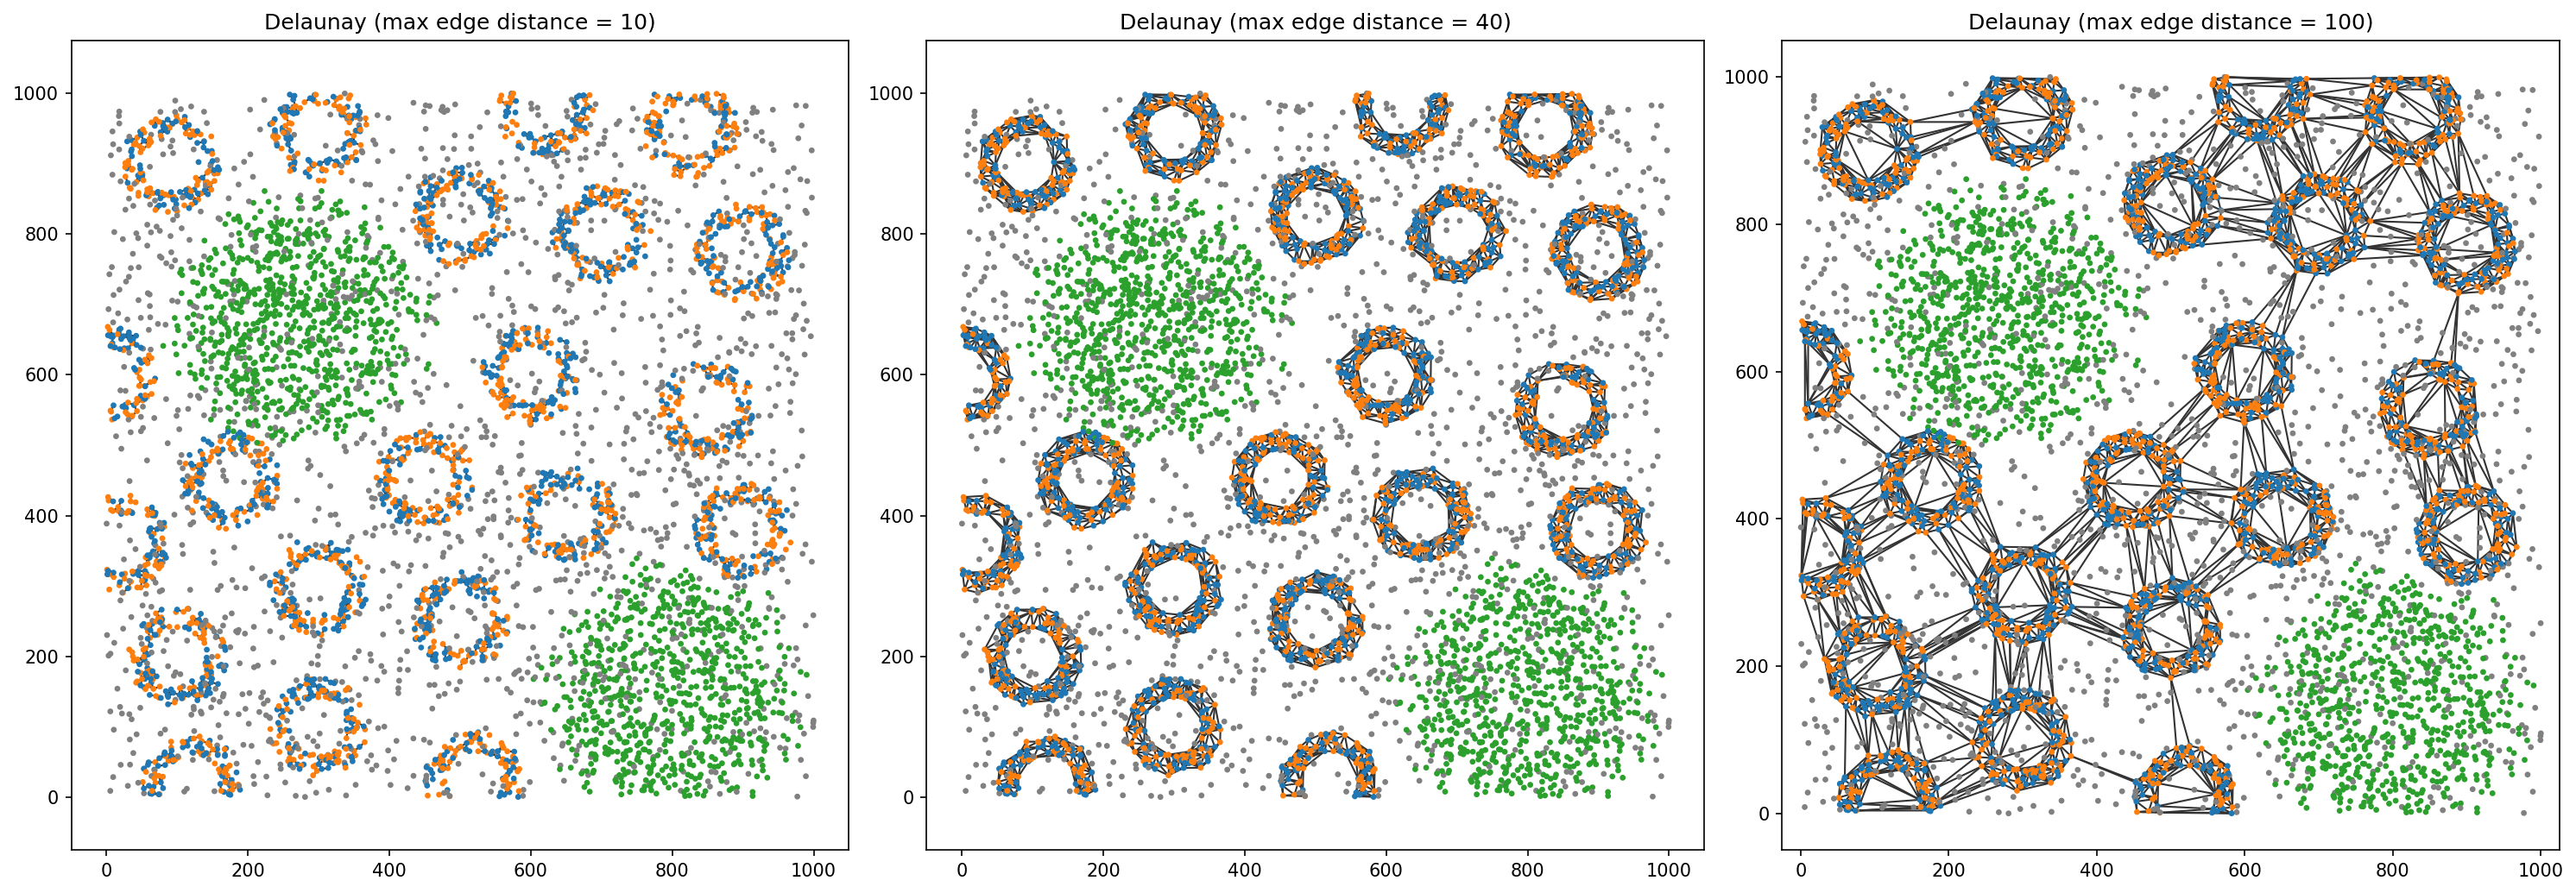

In [2]:
# Define the maximum edge distances to visualize
max_edge_distances = [10, 40, 100]

# Define visualization options for the nodes
node_visualise_options = {
    'marker_size': 5,
    'color_by': 'Celltype',
    'add_cbar': False,
    'shape_kwargs': {'edgecolor': 'black', 'linewidth': 2}
}

# Query to select objects of type 'A' or 'B' in the 'domain_arch'
q_A_or_B = ms.query.query(domain_arch, ('label', 'Celltype'), 'in', ['A', 'B'])

# Create a figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

# Loop through each maximum edge distance and visualize the corresponding network
for i, m_edge in enumerate(max_edge_distances):
    # Generate the Delaunay network for the current max edge distance
    network_name = f'Del (max = {m_edge})'
    ms.networks.generate_network(
        domain_arch,
        network_name=network_name,
        objects_as_nodes=q_A_or_B,
        network_type='Delaunay',
        min_edge_distance=0,
        max_edge_distance=m_edge
    )
    
    # Visualize the generated network
    ms.visualise.visualise_network(
        domain_arch,
        network_name=network_name,
        ax=ax[i],
        add_cbar=False,
        visualise_kwargs=node_visualise_options,
        edge_weight_name=None
    )
    
    # Set the title for the subplot
    ax[i].set_title(f'Delaunay (max edge distance = {m_edge})')

We can see that the network structure is very different as we increase the max edge distance between the points. From almost no edges, to edges only within the 'crypts', to connecting the 'crypts' This can be thought of as a distance filtration and might want to meausre how this network is changing as we increase this distance. 

Before quantifying how this network might be changing relative to it's max distance threshold, we'll load in a few more example datasets to compare to.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Density
Number of objects: 2000
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []
MuSpAn domain loaded successfully. Domain summary:
Domain name: Aggregation
Number of objects: 2000
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []
MuSpAn domain loaded successfully. Domain summary:
Domain name: Exclusion
Number of objects: 2166
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


Text(0.5, 1.0, 'Architecture')

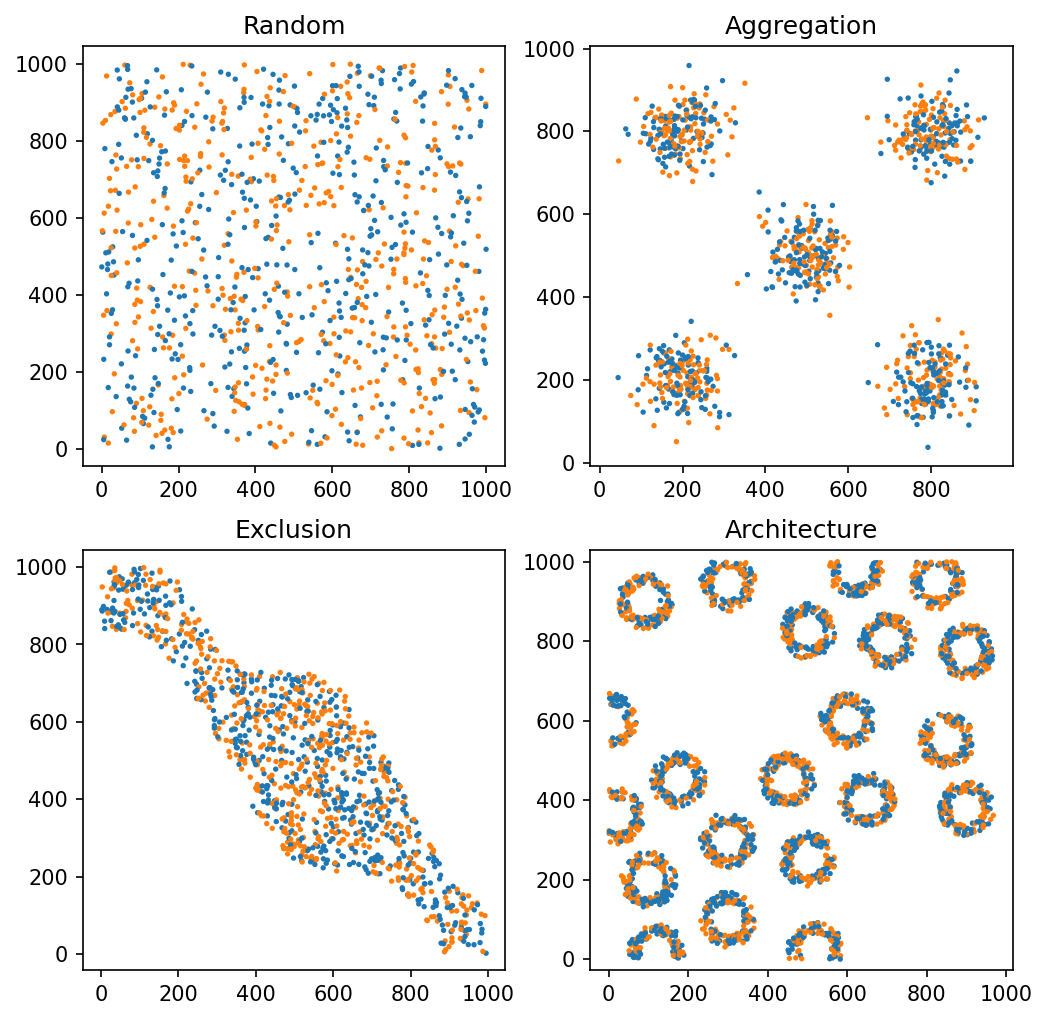

In [3]:
# Load example domains for different spatial configurations
domain_rand = ms.datasets.load_example_domain('Synthetic-Points-Random')
domain_agg = ms.datasets.load_example_domain('Synthetic-Points-Aggregation')
domain_ex = ms.datasets.load_example_domain('Synthetic-Points-Exclusion')

# Query to select objects of type 'A' or 'B' in each domain
q_A_or_B_rand = ms.query.query(domain_rand, ('label', 'Celltype'), 'in', ['A', 'B'])
q_A_or_B_agg = ms.query.query(domain_agg, ('label', 'Celltype'), 'in', ['A', 'B'])
q_A_or_B_ex = ms.query.query(domain_ex, ('label', 'Celltype'), 'in', ['A', 'B'])
q_A_or_B_arch = ms.query.query(domain_arch, ('label', 'Celltype'), 'in', ['A', 'B'])

# Create a figure with 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(8, 8), gridspec_kw={'hspace': 0.2})

# Visualize the 'Random' domain
ms.visualise.visualise(domain_rand, 'Celltype', ax=ax[0, 0], add_cbar=False, marker_size=2.5, objects_to_plot=q_A_or_B_rand)
ax[0, 0].set_title('Random')

# Visualize the 'Aggregation' domain
ms.visualise.visualise(domain_agg, 'Celltype', ax=ax[0, 1], add_cbar=False, marker_size=2.5, objects_to_plot=q_A_or_B_agg)
ax[0, 1].set_title('Aggregation')

# Visualize the 'Exclusion' domain
ms.visualise.visualise(domain_ex, 'Celltype', ax=ax[1, 0], add_cbar=False, marker_size=2.5, objects_to_plot=q_A_or_B_ex)
ax[1, 0].set_title('Exclusion')

# Visualize the 'Architecture' domain
ms.visualise.visualise(domain_arch, 'Celltype', ax=ax[1, 1], add_cbar=False, marker_size=2.5, objects_to_plot=q_A_or_B_arch)
ax[1, 1].set_title('Architecture')

Now that we have our datasets, we can use for-loops to generate networks for each domain at a given maximum edge distance. Here, we'll generate a Delaunay network and measure how well connected these networks are using the gamma index (`gamma_index`) at each of these distances for demonstration.

The gamma index evaluates how well the nodes in a network are connected by comparing the actual number of edges to the maximum possible number of edges for a planar network. These values are bound between 0 and 1, where 1 indicates very high connectivity of the network - information can propagate across nodes easily.

Let's see this in action by generating networks with maximum edge distance for 0 to 100 in 5 unit intervals. Each network is stored with the respective domain it is being generated from.

In [4]:
# Measure properties of the network at different lengths of max edge distance

# Define the range of maximum edge distances to analyze
max_edge_distances = np.arange(0, 100, 5)

# Initialize lists to store gamma index values for each domain
gamma_index_rand = np.zeros(len(max_edge_distances))
gamma_index_agg = np.zeros(len(max_edge_distances))
gamma_index_ex = np.zeros(len(max_edge_distances))
gamma_index_arch = np.zeros(len(max_edge_distances))

# Loop through each maximum edge distance
for i,m_edge in enumerate(max_edge_distances):
    # Define network names for each domain
    this_network_name_rand = f'Del rand (max = {m_edge})'
    this_network_name_agg = f'Del agg (max = {m_edge})'
    this_network_name_ex = f'Del ex (max = {m_edge})'
    this_network_name_arch = f'Del arch (max = {m_edge})'
    
    # Generate the Delaunay networks for each domain
    this_network_rand = ms.networks.generate_network(domain_rand, network_name=this_network_name_rand, network_type='Delaunay', objects_as_nodes=q_A_or_B_rand, min_edge_distance=0, max_edge_distance=m_edge)
    this_network_agg = ms.networks.generate_network(domain_agg, network_name=this_network_name_agg, network_type='Delaunay', objects_as_nodes=q_A_or_B_agg, min_edge_distance=0, max_edge_distance=m_edge)
    this_network_ex = ms.networks.generate_network(domain_ex, network_name=this_network_name_ex, network_type='Delaunay', objects_as_nodes=q_A_or_B_ex, min_edge_distance=0, max_edge_distance=m_edge)
    this_network_arch = ms.networks.generate_network(domain_arch, network_name=this_network_name_arch, network_type='Delaunay', objects_as_nodes=q_A_or_B_arch, min_edge_distance=0, max_edge_distance=m_edge)
    
    # Measure the gamma index for each generated network
    gamma_index_rand[i]=ms.networks.gamma_index(domain_rand, network_name=this_network_name_rand, is_planar=True)
    gamma_index_agg[i]=ms.networks.gamma_index(domain_agg, network_name=this_network_name_agg, is_planar=True)
    gamma_index_ex[i]=ms.networks.gamma_index(domain_ex, network_name=this_network_name_ex, is_planar=True)
    gamma_index_arch[i]=ms.networks.gamma_index(domain_arch, network_name=this_network_name_arch, is_planar=True)

Now we have our gamma values for each network over the distance range, we can plot the results using matplotlib.

Text(0, 0.5, 'Gamma index ($\\gamma$)')

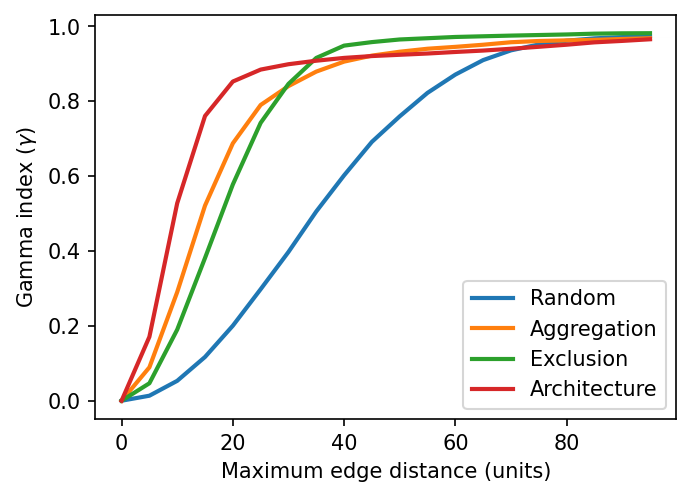

In [5]:
# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots( figsize=(5, 3.5))

# Plot the gamma index for different domains
ax.plot(max_edge_distances, gamma_index_rand, label='Random', linewidth=2)
ax.plot(max_edge_distances, gamma_index_agg, label='Aggregation', linewidth=2)
ax.plot(max_edge_distances, gamma_index_ex, label='Exclusion', linewidth=2)
ax.plot(max_edge_distances, gamma_index_arch, label='Architecture', linewidth=2)
ax.legend()
ax.set_xlabel('Maximum edge distance (units)')
ax.set_ylabel('Gamma index ($\\gamma$)')



We can see that the gamma index is much greater in the architecture domain at lower distances (<20). As the Delaunay network is a planar network, this highlights that the architecture domain has points labelled A or B in a much closer proximity when compared to the other domains. However this tapers off quickly as the it required a larger distance ~40units to connect the cirles, whereas the exclusion domain forms a single connected component for the A and B points, indicated by the evalated gamma index at this distance.

This is just once example of using network properties to examine the differences in spatial structural at different length scales. We have selected only one network type, one type of distance filtration and one property to measure. By changing any of these we are able to explore new perpective of our data using spatial networks and therefore we enourage playing around with the networks module in MuSpAn to build the most appropriate filterations for your analysis.

